# Personal Notebook of CNN - mnist


## Why CNN ? 
The main structural feature of RegularNets is that all the neurons are connected to each other. For example, when we have images with 28 by 28 pixels with only greyscale, we will end up having 784 (28 x 28 x 1) neurons in a layer which seems manageable. However, most images have way more pixels and they are not grey-scaled. Therefore, assuming that we have a set of color images in 4K Ultra HD, we will have 26,542,080 (4096 x 2160 x 3) different neurons connected to each other in the first layer which is not really manageable. Therefore, we can say that RegularNets are not scalable for image classification. However, especially when it comes to images, there seems to be little correlation or relation between two individual pixels unless they are close to each other. This leads to the idea of Convolutional Layers and Pooling Layers.

## Important Hightlight : 

 - in CNNs, there are also Convolutional Layers, Pooling Layers, and Flatten Layers. 
 - CNNs are mainly used for image classification
 - RegularNets are not scalable for image classification. This leads to the idea of Convolutional Layers and Pooling Layers.
 - convolution, pooling, and fully connect layers are the most important ones.
 

### Convolutional Layers : 
 - Convolutional layer is the very first layer where we extract features from the images in our datasets.
 - Due to the fact that pixels are only related with the adjacent and close pixels, convolution allows us to preserve the relationship between different parts of an image.
 - Convolution is basically filtering the image with a smaller pixel filter to decrease the size of the image without loosing the relationship between pixels.

### Pooling layer : 
- When constructing CNNs, it is common to insert pooling layers after each convolution layer to reduce the spatial size of the representation to reduce the parameter counts which reduces the computational complexity.
 - pooling layers also helps with the overfitting problem.
 - we select a pooling size to reduce the amount of the parameters by selecting the maximum, average, or sum values inside these pixels.


 ### src : https://towardsdatascience.com/image-classification-in-10-minutes-with-mnist-dataset-54c35b77a38d 

 

## Import Usefull library

In [49]:
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten, AveragePooling2D
from keras.utils import to_categorical
import numpy as np
%matplotlib inline
print(tf.__version__)


2.1.0


## Load & Reshape X_train, X_test

In [33]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

## Split the data & Convert "y" dataset to one hot matrix

In [61]:
X_val = X_train[-10000:,:]
y_val = y_train[-10000:]

X_train = X_train[:-10000,:]
y_train = y_train[:-10000]

y_train_hot = to_categorical(y_train)
y_test_hot = to_categorical(y_test)
y_val_hot = to_categorical(y_val)

## Normalize "X" dataset

In [35]:
X_train = X_train / 255
X_test = X_test / 255
X_val = X_val / 255

## Create the CNN model
layer consist of  Conv2D, MaxPooling, Flatten, Dropout, and Dense layers.


In [40]:
model = Sequential([
    Conv2D(28, kernel_size=(3,3), strides=(1,1), input_shape=(28,28,1), activation="relu"),
    AveragePooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128, activation="relu"),
    Dense(10, activation="softmax")
])

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 28)        280       
_________________________________________________________________
average_pooling2d_1 (Average (None, 13, 13, 28)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 4732)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               605824    
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 607,394
Trainable params: 607,394
Non-trainable params: 0
_________________________________________________________________


In [41]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x=X_train, y=y_train_hot, epochs=5)

Epoch 1/5
50000/50000 [==============================] - 33s 651us/step - loss: 0.2014 - accuracy: 0.9405
Epoch 2/5
50000/50000 [==============================] - 35s 707us/step - loss: 0.0667 - accuracy: 0.9796
Epoch 3/5
50000/50000 [==============================] - 43s 850us/step - loss: 0.0438 - accuracy: 0.9858
Epoch 4/5
50000/50000 [==============================] - 37s 746us/step - loss: 0.0321 - accuracy: 0.9897
Epoch 5/5
50000/50000 [==============================] - 39s 777us/step - loss: 0.0227 - accuracy: 0.9928


In [46]:
scores = model.evaluate(X_test, y_test_hot)
print("Score : ", scores[1]*100)

10000/10000 [==============================] - 1s 136us/step
Score :  98.33999872207642


In [51]:
predictions = model.predict(X_test.astype("float32"))

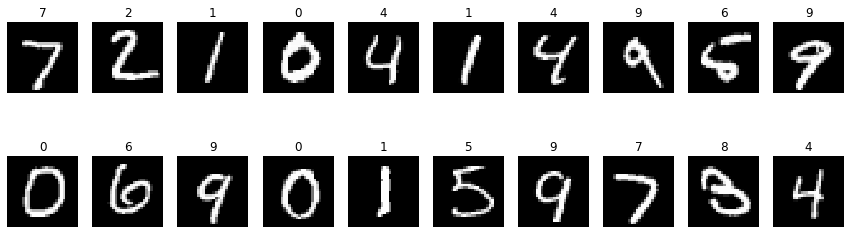

In [58]:
fig, ax = plt.subplots(2,10,figsize=(15,4.5))
for j in range(0,2):
    for i in range(0, 10):
        ax[j,i].imshow(X_test[i+j*10].reshape(28,28), cmap='gray')
        ax[j,i].set_title(np.argmax(predictions[i+j*10]))
        ax[j,i].axis('off')
plt.show()